In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dtype = np.dtype('B')
try:
    with open("sample.bin", "rb") as f:
        numpy_data = np.fromfile(f,dtype)
    print(numpy_data)
except IOError:

    print('Error While Opening the file!') 

[ 0  0  0 ...  0 16  0]


In [3]:
data = numpy_data
data.shape

(96000000,)

In [4]:
no_of_bitplanes = 10000
matrix_data = data.reshape((no_of_bitplanes,-1))
matrix_data

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,  16,   0],
       [  0,   0,   0, ..., 128,  32,  20],
       [  0,   0,   0, ...,   0,  16,   0]], dtype=uint8)

In [5]:
matrix_data.shape

(10000, 9600)

In [6]:
kazma = matrix_data.sum(axis = 1)
kazma.shape

(10000,)

(250000.0, 500000.0)

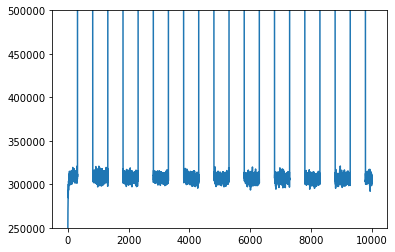

In [7]:
plt.plot(kazma)
plt.ylim([250000,500000])
#plt.xlim([4000, 4200])

In [8]:
x_range = 320
y_range = 240
matrix_3D = np.zeros((y_range,x_range,no_of_bitplanes),dtype=np.bool_)

for i in range(no_of_bitplanes):
    frame = matrix_data[i,:].astype(np.uint8)
    bit_frame = np.unpackbits(frame).reshape((240,320))
    matrix_3D[:,:,i] = bit_frame
matrix_3D.shape     

(240, 320, 10000)

<IPython.core.display.Javascript object>


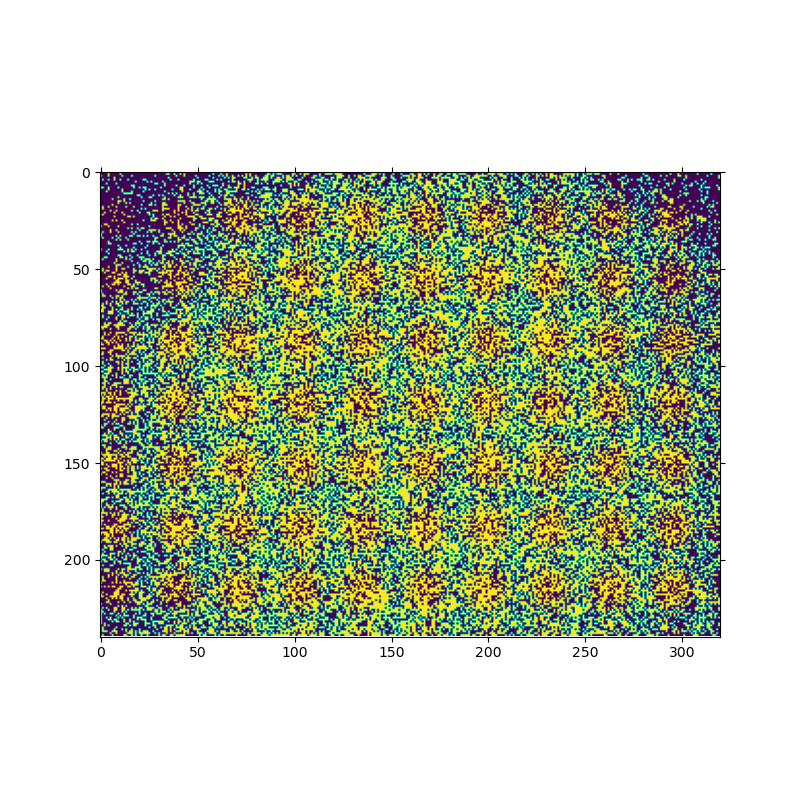

In [ ]:
#plt.imshow(matrix_3D[:,:,4])

# need this line if you're using jupyter notebooks
%matplotlib notebook

x = matrix_3D # Some array of images
fig = plt.figure(figsize=(8,8))
viewer = fig.add_subplot(111)
plt.ion() # Turns interactive mode on (probably unnecessary)
fig.show() # Initially shows the figure

for i in range(10000):
    viewer.clear() # Clears the previous image
    viewer.imshow(x[:,:,i]) # Loads the new image
    #plt.pause(.0001) # Delay in seconds
    fig.canvas.draw() # Draws the image to the screen


In [ ]:
trace_ref = np.zeros((1,no_of_bitplanes))
for i in range(no_of_bitplanes):
    roi=matrix_3D[:,:,i].sum()
    trace_ref[0,i] = roi
trace_ref.shape    

In [ ]:
import matplotlib.pyplot as plt 

t = np.arange(0,no_of_bitplanes).reshape(-1,)
t.shape
trace_ref = trace_ref.reshape(-1,)

In [ ]:
plt.plot(trace_ref)
plt.ylim([5000,15000])
plt.xlim([10000, 11000])

In [ ]:
import scipy.io 
import matplotlib.pyplot as plt
import scipy.signal
from BaselineRemoval import BaselineRemoval
import numpy as np
from scipy.signal import savgol_filter

b, a = scipy.signal.butter(3, 0.03)

filtered = scipy.signal.filtfilt(b,a,trace_ref, axis = 0)

plt.figure(figsize=[60,20])
#plt.plot(recording,'r-')
plt.plot(filtered,'k-',linewidth=10, markersize=60)
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.title('Filtered Signal(Butterworth Filter)', fontsize = 80)

In [ ]:
kazma = np.array([[0,1],[2,3]])
kazma.sum()

In [ ]:
tempdata = numpy_data.reshape((-1,1))
ti = tempdata[0]
yrange = tempdata[1]
gexp = tempdata[2]
if ti == 1:
    data_dim = tempdata[3+yrange*10*8(1-gexp):].shape
else:
    data_dim = tempdata[3:].shape


In [ ]:
data_size = data_dim[0]*data_dim[1]
blocks = data_size/(9600*(yrange/240))
new_shape =(int(data_size/blocks),int(blocks))

if ti==1:
    tempdata=tempdata[3+yrange*10*8*(1-gexp)*1:].reshape(new_shape)
else:
    tempdata=tempdata[3:].reshape(new_shape)

In [ ]:

blocksize = 100000
save_background = 0
no_signal=1
noise_cancel=0

n=1
kk = 1
b=1
fdata=yrange*320

in_=1
no_signal = 1
bw_frame = np.zeros((1,blocksize*no_signal))

bcapture = 0
summ = 1

bmask = np.zeros((240,320))


In [ ]:
bmask[8:66,239:283] = 1

In [ ]:
tempdata[:4,:4]

In [ ]:
kazma=np.unpackbits(tempdata[40:50,1],axis=0)
hiyar = kazma.reshape(-1,8)
hiyar.shape

In [ ]:
incr_start = 0 + (kk-1)*int(yrange)*40
incr_end = int(yrange)*40*n-1+(kk-1)*yrange*40
print(incr_start,incr_end)

In [ ]:
for cc in range(0,int(blocksize/summ)):
    summ_frame = np.zeros((int(yrange),320),dtype=np.uint32)
    incr_start = 0 + (kk-1)*int(yrange)*40
    incr_end = int(yrange)*40*n-1+(kk-1)*yrange*40